# Introduction to Linear Regression

This week will dive into linear regression, the foundation of this course. The exploration into linear regression will first start with the case when we have 2 **continuous** predictors or attributes. We may write this general model as:

$$
Y = \beta_{0} + \beta_{1} X + \epsilon
$$

Where $Y$ is the outcome attribute. It is also known as the dependent variable. The $X$ term is the predictor/covariate attribute. It is also known as the independent variable. The $\epsilon$ is a random error term, more on this later. Finally, $\beta_{0}$ and $\beta_{1}$ are unknown population coefficients that we are interested in estimating. More on this later too. 

## Specific example

The data used for this section of the course is from the 2019 WNBA season. These data are part of the [*bayesrules* package/book](https://www.bayesrulesbook.com/). The data contain 146 rows, one for each WNBA player sampled, and 32 attributes for that player. The R packages are loaded and the first few rows of the data are shown below. 

In [2]:
library(tidyverse)
library(mosaic)
library(ggformula)

basketball <- readr::read_csv("https://raw.githubusercontent.com/lebebr01/psqf_6243/main/data/basketball.csv")

theme_set(theme_bw(base_size = 18))

Rows: 146 Columns: 32

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): player_name, team
dbl (29): height, weight, year, age, games_played, games_started, avg_minute...
lgl  (1): starter


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
head(basketball)

player_name,height,weight,year,team,age,games_played,games_started,avg_minutes_played,avg_field_goals,⋯,avg_defensive_rb,avg_rb,avg_assists,avg_steals,avg_blocks,avg_turnovers,avg_personal_fouls,avg_points,total_minutes,starter
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Natalie Achonwa,75,190,2019,IND,26,30,18,21.2,3.3,⋯,3.6,5.2,1.6,0.6,0.7,1.0,2.6,8.7,636,TRUE
Kayla Alexander,76,195,2019,CHI,28,3,0,6.7,1.0,⋯,1.7,2.3,0.3,0.0,0.0,0.3,1.0,3.0,20,FALSE
Rebecca Allen,74,162,2019,NYL,26,24,2,17.2,2.7,⋯,2.0,2.5,0.7,0.5,0.8,0.7,2.1,7.2,413,FALSE
Jillian Alleyne,74,193,2019,MIN,24,5,0,2.8,0.4,⋯,0.6,1.0,0.2,0.0,0.2,0.0,0.0,0.8,14,FALSE
Kristine Anigwe,76,200,2019,TOT,22,27,0,9.3,0.8,⋯,1.4,2.4,0.2,0.3,0.3,0.6,1.4,2.4,251,FALSE
Kristine Anigwe,76,200,2019,CON,22,17,0,7.1,0.6,⋯,0.9,1.8,0.2,0.4,0.2,0.6,1.0,2.0,121,FALSE


## Guiding Question

Suppose we are interested in exploring if players tend to score more points by playing more minutes in the season. That is, those that play more may have more opportunities to score more points. More generally, the relationship between average points in each game by the total minutes played across the season. 

One first step in an analysis would be to explore each distribution independently first. I'm going to leave that as an exercise for you to do on your own. 

The next step would be to explore the bivariate figure of these two attributes. As both of these attributes are continuous ratio type attributes, a scatterplot would be one way to visualize this. A scatterplot takes each X,Y pair of data and plots those coordinates. This can be done in R with the following code.

In [ ]:
gf_point(avg_points ~ total_minutes, data = basketball, size = 4, alpha = .5) %>% 
  gf_labs(x = "Total Minutes Played",
          y = "Average Points Scored")

### Questions to consider
1. What can be noticed about the relationship between these two attributes? 
2. Does there appear to be a relationship between the two? 
3. Is this relationship perfect? 

## Adding a smoother line
Adding a smoother line to the figure can help to guide how strong the relationship may be. In general, there are two types of smoothers that we will consider in this course. One is flexible and data dependent. This means that the functional form of the relationship is flexible to allow the data to specify if there are in non-linear aspects. The second is a linear or straight-line approach. 

I'm going to add both to the figure below. The flexible (in this case this is a LOESS curve) curve is darker blue, the linear line is lighter blue. 

Does there appear to be much difference in the relationship across the two lines?

In [ ]:
gf_point(avg_points ~ total_minutes, data = basketball, size = 4, alpha = .5) %>% 
  gf_smooth() %>%
  gf_smooth(method = 'lm', linetype = 2, color = 'lightblue') %>%
  gf_labs(x = "Total Minutes Played",
          y = "Average Points Scored")

## Estimating linear regression coefficients

The linear regression coefficients can be estimated within any statistical software (or by hand, even if tedious). Within R, the primary function is `lm()` to estimate a linear regression. The primary argument is a formula similar to the regression formula shown above at the top of the notes. 

This equation could be written more directly for our specific problem. 

$$
Avg\_points = \beta_{0} + \beta_{1} Minutes\_Played + \epsilon
$$

For the R formula, instead of an $=$, you could insert a $~$. 

In [3]:
wnba_reg <- lm(avg_points ~ total_minutes, data = basketball)
coef(wnba_reg)

(Intercept) total_minutes 
   1.13562456    0.01014207

## Interpretting linear regression terms

Now that we have estimates for the linear regression terms, how are these interpretted? The linear regression equation with these estimates plugged in would look like the following: 

$$
\hat{avg\_points} = 1.1356 + .0101 min\_played
$$

Where instead of $\beta_{0}$ or $\beta_{1}$, the estimated values from this single season were inserted. Note the $\hat{avg\_points}$, which the caret symbol is read as a hat, that is, average points hat, is a very important small distinction. This now represents the predicted values for the linear regression. That means, that the predicted value for the average number of points is assumed to function solely based on the minutes a player played. We could put in any value for the minutes played and get an estimated average number of points out. 

In [ ]:
1.1356 + .0101 * 0
1.1356 + .0101 * 1
1.1356 + .0101 * 100
1.1356 + .0101 * mean(basketball$avg_points)
1.1356 + .0101 * 5000
1.1356 + .0101 * -50

Also notice from the equation above with the estimated coefficients, there is no longer any error. More on this later, but I wanted to point that out now. Back to model interpretations, these can become a bit more obvious with the values computed above by inputting specific values for the total minutes played. 

First, for the intercept ($\beta_{0}$), notice that for the first computation above when 0 total minutes was input into the equation, that the same value for the intercept estimate was returned. This highlights what the intercept is, the average number of points scored when the X attribute (minutes played) equals 0. 

The slope, ($\beta_{1}$), term is the average change in the outcome (average points here) for a one unit change in the predictor attribute (minutes played). Therefore, the slope here is 0.0101, which means that the average points scores increases by about 0.01 points for every additional minute played. This effect is additive, meaning that the 0.01 for a one unit change, say from 100 to 101 minutes, will remain when increasing from 101 to 102 minutes. 

The predictions coming from the linear regression are the same as the light blue dashed line shown in the figure above and recreated here without the dark blue line. 

In [ ]:
gf_point(avg_points ~ total_minutes, data = basketball, size = 4, alpha = .5) %>% 
  gf_smooth(method = 'lm', linetype = 2, color = 'lightblue') %>%
  gf_labs(x = "Total Minutes Played",
          y = "Average Points Scored")

## What about the error?

So far the error has been disregarded, but where did it go? The error didn't disappear, it is actually in the figure just created above. Where can you see the error? Why was it disregarded when creating the predicted values? 

The short answer is that the error in a linear regression is commonly assumed to follow a Normal distribution with a mean of 0 and some variance, $\sigma^2$. Sometimes this is written in math notation as:

$$ 
\epsilon \sim N(0, \sigma^2)
$$

From this notation, can you see why the error was disregarded earlier when generating predictions? 

In short, on average, the error is assumed to be 0 across all the sample data. The error will be smaller when the data are more closely clustered around the linear regression line and larger when the data are not clustered around the linear regression line. In the simple case with a single predictor, the error would be minimized when the correlation is closest to 1 in absolute value and largest when the correlation close to or equals 0. 

### Estimating error in linear regression

This comes from partitioning of variance that you maybe heard from a design of experiment or analysis of variance course. More specifically, the variance in the outcome can be partioned or split into two components, those that the independent attribute helped to explain vs those that it can not explain. The part that can be explained is sometimes referred to as the *sum of squares regression* (SSR), the portion that is unexplained is referred to as the *sum of squares error* (SSE). This could be written in math notation as:

$$ 
\sum (Y - \bar{Y})^2 = \sum (Y - \hat{Y})^2 + \sum (\hat{Y} - \bar{Y})^2
$$

Let's try to visualize what this means. 

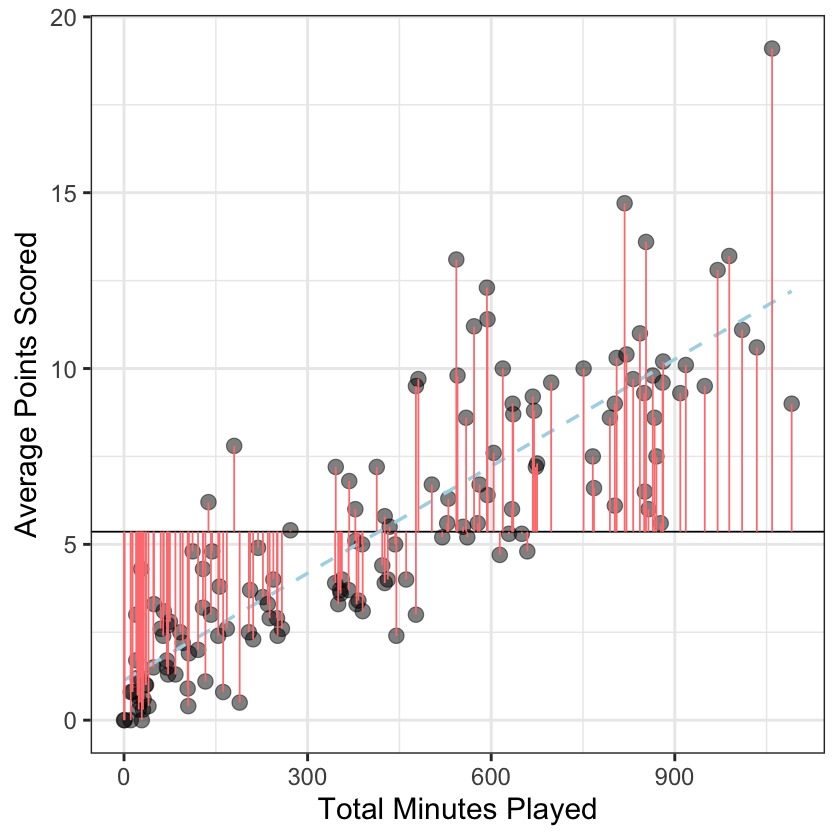

In [12]:
gf_point(avg_points ~ total_minutes, data = basketball, size = 4, alpha = .5) %>% 
  gf_hline(yintercept = ~mean(avg_points), data = basketball) %>%
  gf_smooth(method = 'lm', linetype = 2, color = 'lightblue') %>%
  gf_segment(avg_points + mean(avg_points) ~ total_minutes + total_minutes, data = basketball, color = '#FF7F7F') %>%
  gf_labs(x = "Total Minutes Played",
          y = "Average Points Scored")

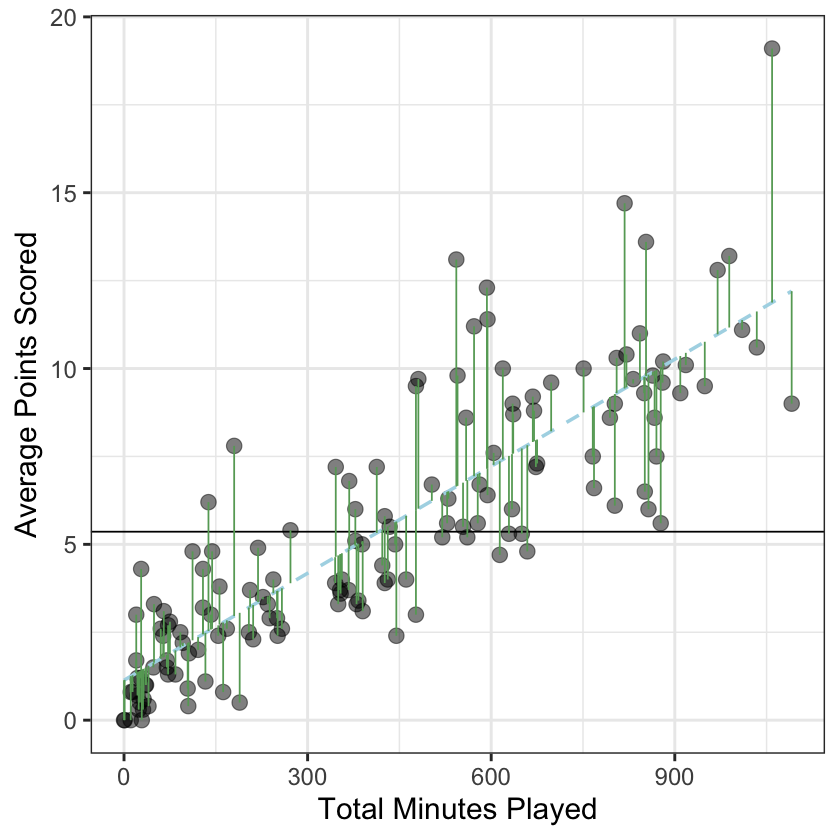

In [14]:
gf_point(avg_points ~ total_minutes, data = basketball, size = 4, alpha = .5) %>% 
  gf_hline(yintercept = ~mean(avg_points), data = basketball) %>%
  gf_smooth(method = 'lm', linetype = 2, color = 'lightblue') %>%
  gf_segment(avg_points + fitted(wnba_reg) ~ total_minutes + total_minutes, data = basketball, color = '#65a765') %>%
  gf_labs(x = "Total Minutes Played",
          y = "Average Points Scored")

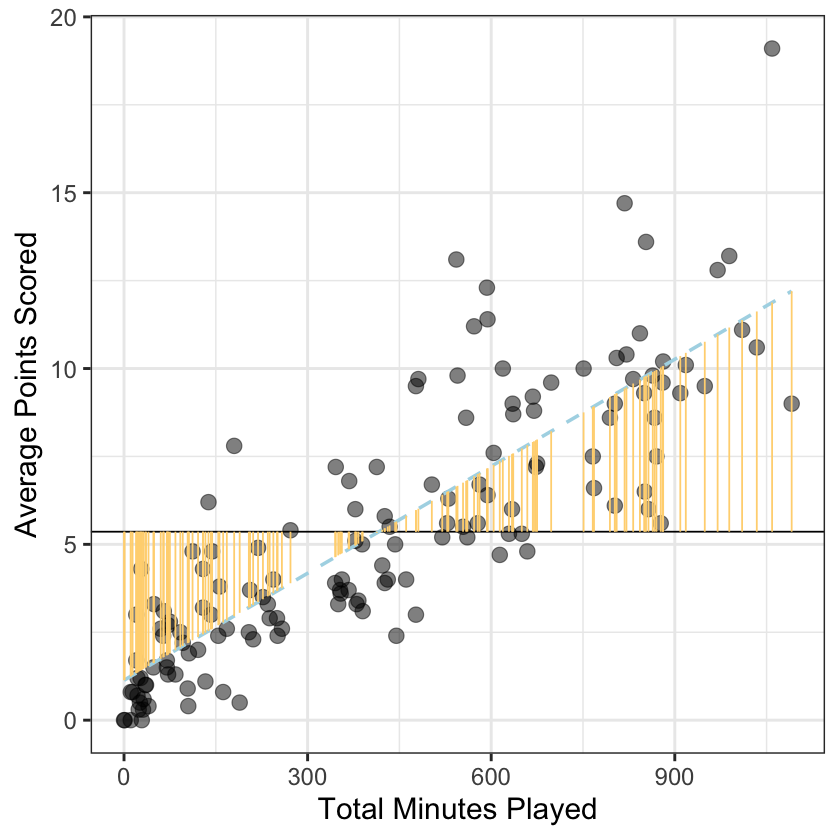

In [15]:
gf_point(avg_points ~ total_minutes, data = basketball, size = 4, alpha = .5) %>% 
  gf_hline(yintercept = ~mean(avg_points), data = basketball) %>%
  gf_smooth(method = 'lm', linetype = 2, color = 'lightblue') %>%
  gf_segment(mean(avg_points) + fitted(wnba_reg) ~ total_minutes + total_minutes, data = basketball, color = '#FFD580') %>%
  gf_labs(x = "Total Minutes Played",
          y = "Average Points Scored")

## Another related measure of error

Another way to get a measure of how well the model is performing, would be a statistic called R-squared. This statistic is a function of the sum of squares described above.

$$
R^{2} = 1 - \frac{SS_{res}}{SS_{total}}
$$

or

$$
R^{2} = \frac{SS_{reg}}{SS_{total}}
$$

Let's compute the sum of square and get a value for $R^2$. 

In [21]:
basketball %>%
summarise(ss_total = sum((avg_points - mean(avg_points))^2),
          ss_error = sum((avg_points - fitted(wnba_reg))^2),
          ss_reg = sum((fitted(wnba_reg) - mean(avg_points))^2)) %>%
mutate(r_square = 1 - ss_error / ss_total,
       r_square2 = ss_reg / ss_total)

summary(wnba_reg)$r.square
summary(wnba_reg)$sigma

sigma_hat_square <- 563.9929 / (nrow(basketball) - 2)
sigma_hat <- sqrt(sigma_hat_square)

sigma_hat_square
sigma_hat

ss_total,ss_error,ss_reg,r_square,r_square2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2003.752,563.9929,1439.759,0.7185315,0.7185315


[1] 0.7185315

[1] 1.979045

[1] 3.916617

[1] 1.979045